In [ ]:
pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993225 sha256=09dbcd927cdcafd35b6dbd780df48505ae33a1ba02ab1016b143d182420dfabf
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from langdetect import detect, DetectorFactory

# Make results reproducible in langdetect
DetectorFactory.seed = 0

# Downloading necessary NLTK resources for tokenization, stopwords, and lemmatization
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Loading the dataset from a CSV file
df = pd.read_csv('/content/drive/MyDrive/data/Facebook_India_Canada_Posts_Oct4_2023.csv', low_memory=False)

# Replacing NaN values with 'unknown' for the entire DataFrame to handle missing values
df.fillna('unknown', inplace=True)
df = df[df['Message'] != '']

df['Links'] = df['Message'].apply(lambda text: re.findall(r'https?://\S+|www\.\S+', text))

# Define a function to remove URLs using regex
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub('', text)

# Define a comprehensive clean_text function
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = remove_urls(text)  # Remove URLs
    text = re.sub(r'#\w+', '', text)  # Remove Hashtags
    text = re.sub(r'@\w+', '', text)  # Remove Mentions
    text  = re.sub(r'[^a-z\s]', '', text)  # Remove non-alphabetic characters except spaces
    text = re.sub(r'\s+', ' ', text).strip()  # Normalize whitespace
    tokens = word_tokenize(text)  # Tokenize
    # Lemmatize and remove stopwords
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in combined_stopwords]
    return ' '.join(tokens)

# Define a function to detect the language
def detect_language(text):
    try:
        return detect(text)
    except:
        return 'unknown'

english_stopwords = set(stopwords.words('english'))

# Previously added custom stopwords
custom_stopwords = {'india', 'canada'}

# Remove 'india' and 'canada' from the stopwords list if they are present
english_stopwords.difference_update(custom_stopwords)

# Load stopwords from external files
with open('/content/drive/MyDrive/data/Colab Notebooks/english.txt', 'r') as file:
    english_stopwords = set(file.read().splitlines())

with open('/content/drive/MyDrive/data/Colab Notebooks/hindi.txt', 'r') as file:
    hindi_stopwords = set(file.read().splitlines())

with open('/content/drive/MyDrive/data/Colab Notebooks/Punjabi .txt', 'r') as file:
    punjabi_stopwords = set(file.read().splitlines())

# Combine stop words from different languages
combined_stopwords = english_stopwords.union(hindi_stopwords).union(punjabi_stopwords)

# Initialize the WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

# Apply the clean_text function to the 'Message' column to clean and lemmatize the text
df['Cleaned_Message'] = df['Message'].apply(clean_text)

# Detect language for each cleaned message
df['Language'] = df['Cleaned_Message'].apply(detect_language)

#Tokenize the cleaned messages into words
df['Tokens'] = df['Cleaned_Message'].apply(lambda x: word_tokenize(x))

# Remove duplicate entries based on the 'Cleaned_Message' column to avoid redundancy
df = df.drop_duplicates(subset=['Cleaned_Message'])

# Save the cleaned and processed dataframe to a new CSV file
df.to_csv('/content/drive/MyDrive/data/cleaned_Facebook_India_Canada_Posts_Oct4_2023.csv', index=False)

print("Data cleaning and processing completed with language detection!")



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Data cleaning and processing completed with language detection!


In [ ]:
from textblob import TextBlob

# Define a function to analyze sentiment
def analyze_sentiment(text):
    # Create a TextBlob object
    blob = TextBlob(text)
    # Return the polarity and subjectivity
    return blob.sentiment.polarity, blob.sentiment.subjectivity

# Apply the analyze_sentiment function to the 'Cleaned_Message' column
df['Sentiment'] = df['Cleaned_Message'].apply(lambda text: analyze_sentiment(text))

# Split the Sentiment tuple into two separate columns for easier analysis
df[['Polarity', 'Subjectivity']] = pd.DataFrame(df['Sentiment'].tolist(), index=df.index)

# drop the 'Sentiment' column , as it's redundant
df.drop(columns=['Sentiment'], inplace=True)

# inspect polarity and subjectivity scores
print(df[['Cleaned_Message', 'Polarity', 'Subjectivity']].head())

# Save the DataFrame with sentiment analysis results to a new CSV file
df.to_csv('/content/drive/MyDrive/data/sentiment_Facebook_India_Canada_Posts_Oct4_2023.csv', index=False)

print("Sentiment analysis completed with TextBlob!")


                                     Cleaned_Message  Polarity  Subjectivity
0                                                     0.000000      0.000000
1  canada take on trudeau raise concern over khal... -0.325000      0.675000
2                    anti india khalistani canada pm  0.000000      0.000000
3                                                raw -0.230769      0.461538
4  join this channel to get access to perk discla...  0.285714      0.535714
Sentiment analysis completed with TextBlob!


In [ ]:
''''

The provided code outlines a thorough method for cleaning, processing, and conducting sentiment analysis on a
 collection of Facebook posts from India and Canada. Initially, it imports necessary libraries for data handling
  and text analysis, and prepares the dataset by filling in missing values and removing entries with empty messages.
   It then extracts and removes hyperlinks from the posts, and applies a series of text cleaning steps including normalization,
   removal of non-relevant characters, and lemmatization, to make the text more analyzable. Additionally, it identifies the language
    of each post and filters out stopwords from English, Hindi, and Punjabi to refine the dataset further.

The cleaned messages are tokenized, and duplicate entries are removed to ensure the uniqueness of the data. This cleaned and
processed dataset is then saved for further analysis. For sentiment analysis, the code utilizes TextBlob to assess the polarity
and subjectivity of each post, indicating how positive or negative, and how objective or subjective the content is, respectively.
 These sentiment scores are stored alongside the original data, which is then saved as a new dataset, providing a comprehensive
 view of the sentiment conveyed in the Facebook posts. This approach effectively prepares and analyzes the dataset, offering
 valuable insights into the sentiments expressed in the social media posts.''''

In [ ]:
df.columns

Index(['Page Name', 'User Name', 'Facebook Id', 'Page Category',
       'Page Admin Top Country', 'Page Description', 'Page Created',
       'Likes at Posting', 'Followers at Posting', 'Post Created',
       'Post Created Date', 'Post Created Time', 'Type', 'Total Interactions',
       'Likes', 'Comments', 'Shares', 'Love', 'Wow', 'Haha', 'Sad', 'Angry',
       'Care', 'Video Share Status', 'Is Video Owner?', 'Post Views',
       'Total Views', 'Total Views For All Crossposts', 'Video Length', 'URL',
       'Message', 'Link', 'Final Link', 'Image Text', 'Link Text',
       'Description', 'Sponsor Id', 'Sponsor Name', 'Sponsor Category',
       'Total Interactions (weighted  —  Likes 1x Shares 1x Comments 1x Love 1x Wow 1x Haha 1x Sad 1x Angry 1x Care 1x )',
       'Overperforming Score', 'Links', 'Cleaned_Message', 'Language',
       'Tokens', 'Polarity', 'Subjectivity', 'Sentiment_Category'],
      dtype='object')

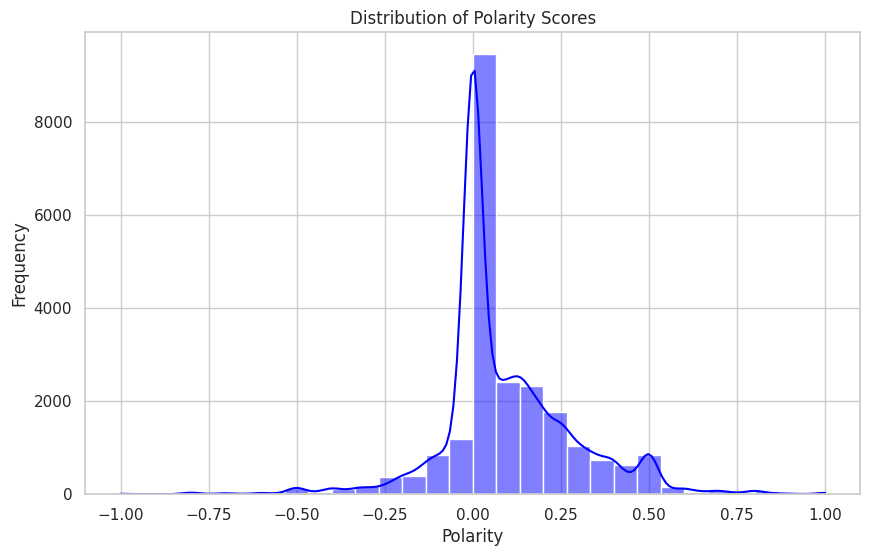

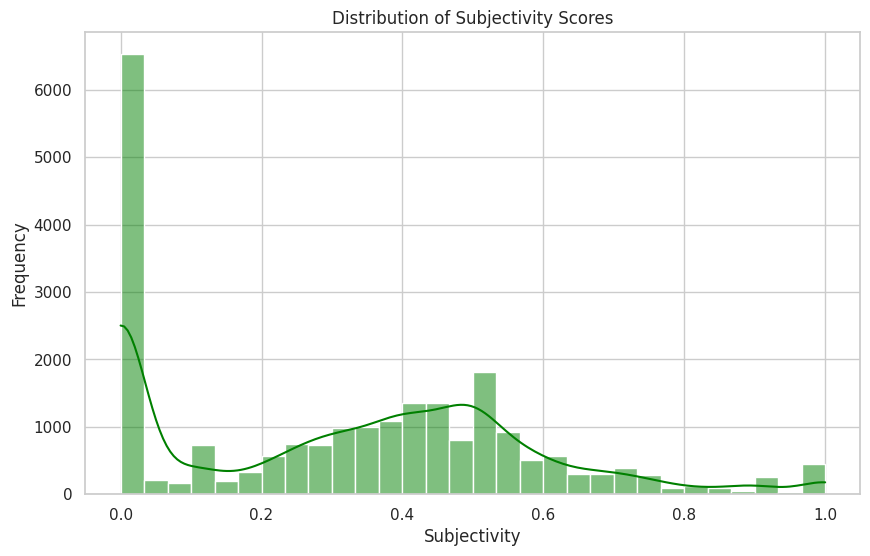

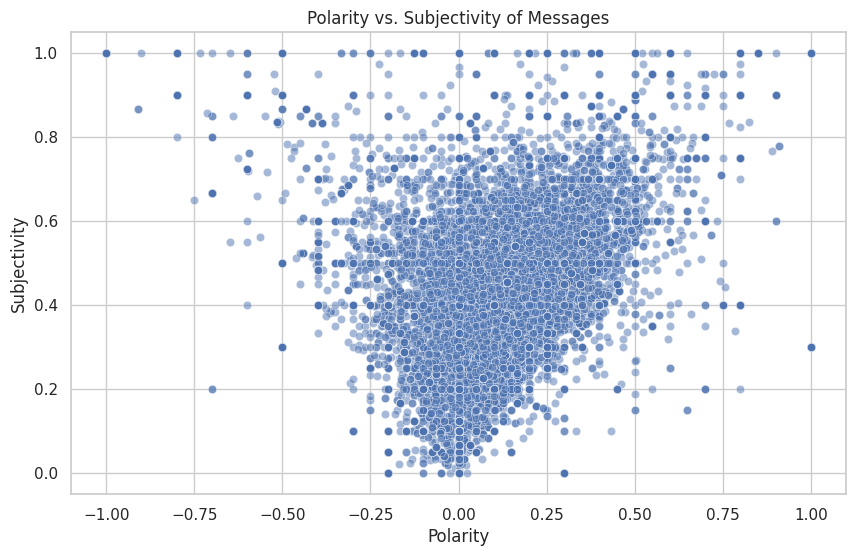

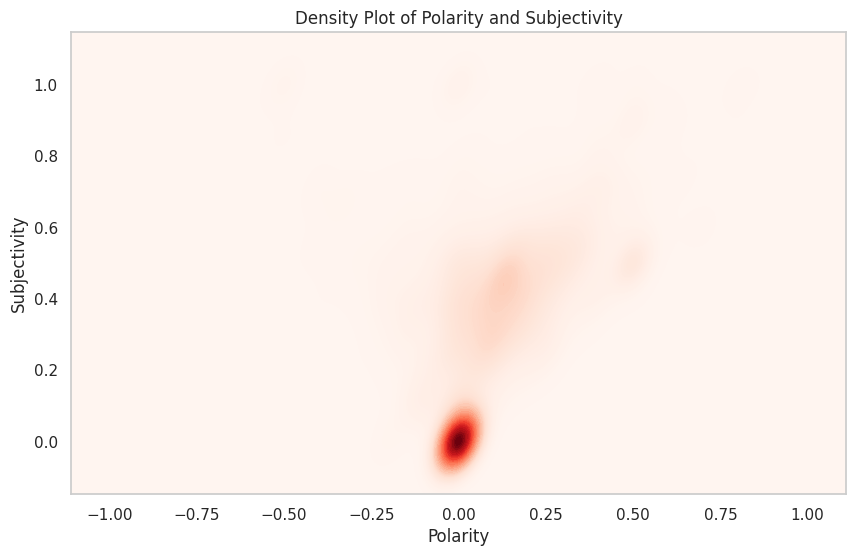

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


# Set the aesthetic style of the plots
sns.set(style='whitegrid')

# 1. Histogram of Polarity Scores
plt.figure(figsize=(10, 6))
sns.histplot(df['Polarity'], bins=30, kde=True, color='blue')
plt.title('Distribution of Polarity Scores')
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.show()

# 2. Histogram of Subjectivity Scores
plt.figure(figsize=(10, 6))
sns.histplot(df['Subjectivity'], bins=30, kde=True, color='green')
plt.title('Distribution of Subjectivity Scores')
plt.xlabel('Subjectivity')
plt.ylabel('Frequency')
plt.show()

# 3. Scatter Plot of Polarity vs. Subjectivity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Polarity', y='Subjectivity', data=df, alpha=0.5)
plt.title('Polarity vs. Subjectivity of Messages')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

# 4. Density Plot of Polarity and Subjectivity
plt.figure(figsize=(10, 6))
sns.kdeplot(x='Polarity', y='Subjectivity', data=df, cmap="Reds", fill=True, thresh=0, levels=100)
plt.title('Density Plot of Polarity and Subjectivity')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()


In [ ]:
'''

Polarity: Polarity indicates the sentiment of the text, whether it's positive or negative. A polarity score closer to 1 indicates a positive sentiment, while a score closer to -1 indicates a negative sentiment.

Subjectivity: Subjectivity indicates the objectivity or subjectivity of the text. A subjectivity score closer to 1 indicates a subjective text, expressing personal opinions or emotions, while a score closer to 0 indicates an objective text, stating facts or information without expressing personal views.

Why is it useful?

Analyzing the polarity and subjectivity of messages can be useful for various reasons:

1. Sentiment Analysis: Polarity and subjectivity scores allow you to gauge the overall sentiment of a large collection of text data. This is particularly useful for social media monitoring, brand reputation management, and customer feedback analysis.

2. Identifying Trends: By analyzing the polarity and subjectivity of messages over time, you can identify trends in sentiment and public opinion. This information can be valuable for understanding how people's attitudes towards a topic or brand are changing.

3. Identifying Influencers: Subjectivity scores can help identify influential individuals or groups within a community or social network. These individuals are more likely to express their personal opinions and influence others.

4. Topic Modeling: Polarity and subjectivity can be used as features for topic modeling algorithms. This can help identify topics that are discussed in a positive or negative light and understand the overall sentiment associated with each topic.



The provided code snippet generates histograms, a scatter plot, and a density plot to visualize the distribution of polarity and subjectivity scores in the dataset. These visualizations can reveal patterns and trends in the sentiment of the messages.

For example, the histogram of polarity scores might show that most messages have a positive sentiment, while the histogram of subjectivity scores might indicate that a significant portion of messages are subjective, expressing personal opinions or emotions.

The scatter plot and density plot can further illustrate the relationship between polarity and subjectivity. For instance, the scatter plot might reveal that messages with high polarity scores (positive or negative) tend to have higher subjectivity scores as well.

These insights can be valuable for understanding the overall sentiment of the messages, identifying trends in public opinion, and exploring how different factors influence the sentiment of the messages.

In [ ]:
import plotly.express as px



# Generate the counts for each category
sentiment_counts = df['Sentiment_Category'].value_counts().reset_index()
sentiment_counts.columns = ['Sentiment_Category', 'Count']

# Define colors for each sentiment category
color_map = {'Positive': 'green', 'Neutral': 'blue', 'Negative': 'red'}

# Create the vertical bar chart
fig = px.bar(sentiment_counts,
             x='Sentiment_Category',
             y='Count',
             title='Count of Messages by Sentiment Category',
             color='Sentiment_Category',
             color_discrete_map=color_map)

# Update layout for a cleaner look
fig.update_layout(
    plot_bgcolor='rgba(0,0,0,0)',  # Transparent background
    paper_bgcolor='rgba(0,0,0,0)',  # Transparent around the plot
    xaxis_title='Sentiment Category',
    yaxis_title='Count',
    legend_title='Sentiment',
    template='plotly_white'
)

# Show the plot
fig.show()


In [ ]:
# Import necessary libraries
from textblob import TextBlob

# Define a function to perform sentiment analysis
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Apply the get_sentiment function to the 'Cleaned_Message' column to generate sentiment scores
df['Sentiment'] = df['Cleaned_Message'].apply(get_sentiment)

# Save the updated dataframe with sentiment scores to a new CSV file
df.to_csv('/content/drive/MyDrive/data/sentiment_Facebook_India_Canada_Posts_Oct4_2023.csv', index=False)

print("Sentiment analysis completed and results saved!")


Sentiment analysis completed and results saved!


In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Create an instance of the SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Define a function to calculate sentiment scores for each message
def get_sentiment_scores(message):
    scores = analyzer.polarity_scores(message)
    return scores

# Apply the get_sentiment_scores function to the 'Cleaned_Message' column
df['Sentiment_Scores'] = df['Cleaned_Message'].apply(get_sentiment_scores)

# Extract individual sentiment scores for positive, negative, neutral, and compound
df['Positive'] = df['Sentiment_Scores'].apply(lambda x: x['pos'])
df['Negative'] = df['Sentiment_Scores'].apply(lambda x: x['neg'])
df['Neutral'] = df['Sentiment_Scores'].apply(lambda x: x['neu'])
df['Compound'] = df['Sentiment_Scores'].apply(lambda x: x['compound'])


df


,Page Name,User Name,Facebook Id,Page Category,Page Admin Top Country,Page Description,Page Created,Likes at Posting,Followers at Posting,Post Created,...,Tokens,Preprocessed_Message,TextBlob_Sentiment,VADER_Sentiment,Sentiment,Sentiment_Scores,Positive,Negative,Neutral,Compound
0,The Political News,ThePoliticalNafis,100076239663357,NEWS_SITE,IN,The Political Official Channel,2021-10-16 22:32:19,411810.0,456544.0,2023-09-20 14:35:25 EDT,...,[],nan,0.000000,0.0000,neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000
1,RJ Raunac,RJRaunac,100044171242480,ARTIST,IN,"India's most popular radio personality, popula...",2011-03-04 14:58:42,907393.0,2826238.0,2023-09-21 03:18:26 EDT,...,"['canada', 'take', 'on', 'trudeau', 'raise', '...",canada take on trudeau raise concern over khal...,-0.325000,-0.9349,negative,"{'neg': 0.17, 'neu': 0.757, 'pos': 0.073, 'com...",0.073,0.170,0.757,-0.9349
2,Bharat Tak,bharattakofficial,100064861927425,ACTIVITY_GENERAL,IN,"भारत के इतिहास से लेकर, भविष्य तक; विकास की कह...",2018-01-22 06:00:41,877184.0,2120282.0,2023-09-07 21:45:55 EDT,...,"['anti', 'india', 'khalistani', 'canada', 'pm']",anti india khalistani canada pm,0.000000,-0.3182,negative,"{'neg': 0.365, 'neu': 0.635, 'pos': 0.0, 'comp...",0.000,0.365,0.635,-0.3182
3,Channel 24,channel24bd.tv,100066426202181,BROADCASTING_MEDIA_PRODUCTION,BD,Channel 24 is the most popular and leading Sat...,2012-01-10 17:16:02,2408595.0,6365379.0,2023-09-19 05:00:38 EDT,...,['raw'],raw,-0.230769,0.0000,negative,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000
4,Ravish Kumar,RavishKaPage,100044427669637,ACTIVITY_GENERAL,IN,मैं ही हूँ। पत्रकार। टीवी वाला। अधूरा,2017-04-06 15:20:05,3919018.0,4256815.0,2023-09-22 08:41:45 EDT,...,"['join', 'this', 'channel', 'to', 'get', 'acce...",join this channel to get access to perk discla...,0.285714,0.2023,positive,"{'neg': 0.062, 'neu': 0.833, 'pos': 0.104, 'co...",0.104,0.062,0.833,0.2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22964,International Business Times,IBTimes,100064580143820,BROADCASTING_MEDIA_PRODUCTION,US,"Real-time news, intelligence and analysis on t...",2010-06-07 08:12:52,450888.0,437175.0,2023-09-20 06:14:42 EDT,...,"['anger', 'from', 'india', 'directed', 'at', '...",anger from india directed at canada is to a gr...,0.300000,0.6597,positive,"{'neg': 0.155, 'neu': 0.462, 'pos': 0.382, 'co...",0.382,0.155,0.462,0.6597
22965,KOSU Radio,kosuradio,100063686085526,RADIO_STATION,US,Central and northeast Oklahoma's NPR affiliate...,2009-09-17 04:09:11,7504.0,7936.0,2023-09-18 17:23:39 EDT,...,"['canada', 'is', 'investigating', 'possible', ...",canada is investigating possible link between ...,0.000000,-0.5994,negative,"{'neg': 0.119, 'neu': 0.881, 'pos': 0.0, 'comp...",0.000,0.119,0.881,-0.5994
22966,WOSU Public Media,wosupublicmedia,100063698524975,BROADCASTING_MEDIA_PRODUCTION,US,WOSU Public Media serves as a gateway to nonpr...,2007-11-10 14:49:48,19422.0,21432.0,2023-09-19 16:25:01 EDT,...,"['it', 'came', 'a', 'day', 'after', 'canadian'...",it came a day after canadian prime minister ju...,0.030556,-0.8126,positive,"{'neg': 0.153, 'neu': 0.817, 'pos': 0.03, 'com...",0.030,0.153,0.817,-0.8126
22967,The Nation,thenationdaily,100064552879672,MEDIA_NEWS_COMPANY,PK,Official page of Pakistan's leading english da...,2009-02-27 06:50:22,1466767.0,1458767.0,2023-10-03 04:46:15 EDT,...,"['after', 'trudeaus', 'accusation', 'which', '...",after trudeaus accusation which also called fo...,0.500000,-0.7650,positive,"{'neg': 0.309, 'neu': 0.625, 'pos': 0.066, 'co...",0.066,0.309,0.625,-0.7650
